In [5]:
import pandas as pd
import seaborn as sns

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


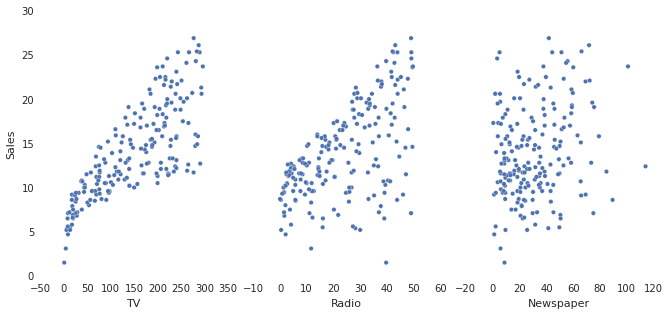

In [9]:
%matplotlib inline
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=4.5, aspect=0.7)


In [10]:
tweets = pd.read_csv('so_many_tweets.csv')


In [22]:
first_tweet = tweets['Text'][0]         # first tweet in the dataset
words_in_tweet = first_tweet.split(' ') # a list of words in the 
for word in words_in_tweet:             # for each word in the list
    if "$" in word:
        print "THIS TWEET IS ABOUT", word



THIS TWEET IS ABOUT $TWTR
THIS TWEET IS ABOUT $AAPL


In [24]:
words_in_tweet


['RT',
 '@j_o_h_n_danger:',
 '$TWTR',
 'now',
 'top',
 'holding',
 'for',
 'Andor,',
 'unseating',
 '$AAPL',
 'http://t.co/vPrx4mUONZ']

In [26]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


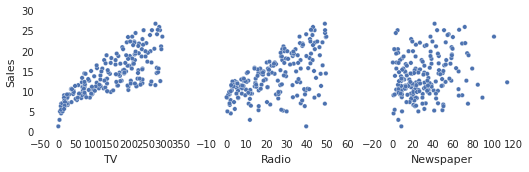

In [28]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales')


In [35]:
import requests
from BeautifulSoup import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer

# grab postings from the web
texts = []
for i in range(0,1000,10): # cycle through 100 pages of indeed job resources
    soup = BeautifulSoup(requests.get('http://www.indeed.com/jobs?q=data+scientist&start='+str(i)).text)
    texts += [a.text for a in soup.findAll('span', {'class':'summary'})]


print type(texts)

print texts[0]   # first job description


<type 'list'>
Applied statistics, calculus, quantitative or statistical methods and techniques,datamining, informatics,datascience, programming, computational algorithms,...


In [39]:
vect = CountVectorizer(ngram_range=(1,2), stop_words='english')
# make a count vectorizer to get basic counts

matrix = vect.fit_transform(texts)
# fit and learn to the vocabulary in the corpus

print len(vect.get_feature_names())  # how many features are there

freqs = [(word, matrix.getcol(idx).sum()) for word, idx in vect.vocabulary_.items()]
#sort from largest to smallest
for phrase, times in sorted (freqs, key = lambda x: -x[1])[:25]:
    print phrase, times
    
    
    

11293
experience 320
machine 306
learning 305
machine learning 294
techniques 266
statistical 215
team 197
analytics 173
business 167
statistics 159
algorithms 152
datamining 149
software 144
applied 141
programming 132
understanding 127
world 127
research 125
datascience 123
methods 122
join 122
quantitative 122
group 121
real 120
large 120


In [37]:
print len(texts)


1492
